<a href="https://www.kaggle.com/code/jatin2055/langgraph-sample-parallel-workflow?scriptVersionId=254921440" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
print("Hello LangGraph!!!")

Hello LangGraph!!!


In [2]:
!pip install pandas
!pip install langgraph
!pip install langchain
!pip install langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.5/443.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.66
    Uninstalling langchain-core-0.3.66:
      Successfully uninstalled langchain-core-0.3.66
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.4 MB/s eta 0:00:00


In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

# Using TypedDict Schema structure

In [5]:
class BatsmanState(TypedDict):

  # input
  runs: int
  balls: int
  fours: int
  sixes: int

  # output
  sr: float
  bpb: float
  boundary_percentage: float
  summary: str

In [7]:
def caculate_strike_rate(state: BatsmanState):

  strike_rate = (state['runs']/state['balls'])*100


  return {'sr': strike_rate}

In [8]:
def calculate_bpb(state: BatsmanState):

  balls_per_boundary = state['balls']/(state['fours'] + state['sixes'])


  return {'bpb': balls_per_boundary }

In [9]:
def calculate_boundary_percentage(state: BatsmanState):

  bp = ( ( (state['fours']*4) + (state['sixes']*6) )/state['runs'] )*100

  return {'boundary_percentage': bp}

In [11]:
def summary(state: BatsmanState) -> BatsmanState:

  summary = f"""
    Strike rate - {state['sr']} \n
    Balls per boundary - {state['bpb']} \n
    Boundary Percent - {state['boundary_percentage']} \n
  """

  # in parallel workflow , since there is only one state all the nodes sending state is
  # assumed to be updating the whole state.
  # here rather than returning the entire state we do partial return in case of a parallel workflow
  return {'summary': summary}

# Workflow

In [12]:
graph = StateGraph(BatsmanState)

graph.add_node('caculate_sr', caculate_strike_rate)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_bdry_percent', calculate_boundary_percentage)
graph.add_node('summary', summary)


graph.add_edge(START, 'caculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_bdry_percent')


graph.add_edge('caculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_bdry_percent', 'summary')

graph.add_edge('summary', END)


workflow = graph.compile()

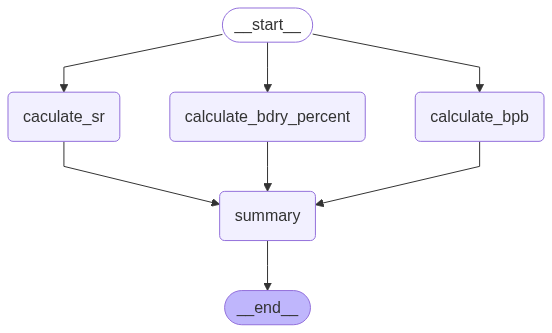

In [13]:
workflow

In [14]:
initial_state = {
    'runs': 200,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

output = workflow.invoke(initial_state)

print(output)

{'runs': 200, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 400.0, 'bpb': 5.0, 'boundary_percentage': 24.0, 'summary': '\n    Strike rate - 400.0 \n\n    Balls per boundary - 5.0 \n\n    Boundary Percent - 24.0 \n\n  '}


# Output

{'runs': 200, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 400.0, 'bpb': 5.0, 'boundary_percentage': 24.0, 'summary': '\n    Strike rate - 400.0 \n\n    Balls per boundary - 5.0 \n\n    Boundary Percent - 24.0 \n\n  '}
